In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Dataset_Intern.xlsx')

In [ ]:
df.min()

Metal_1 AN                    0.9200
Metal_1 group                 0.2000
Metal_1 atomic radius         0.0338
Metal_1 electronegativity     0.0270
Metal_1 m. p.                36.5610
Metal_1 b. p.                64.7200
Prom_1 AN                     0.0000
Prom_1 atomic radius          0.0000
Support                       1.0000
Calc T (oC)                   1.0000
Calc T. (hr)                  0.0000
Temperature (C)               4.7800
H2 vol.%                      0.0000
O2 vol.%                      0.0000
CO vol.%                      0.2000
H2O vol.%                     0.0000
CO2 vol.%                     0.0000
CH4 vol.%                     0.0000
TOS (min)                     0.0000
F/W (mg.min/ml)               0.0000
CO Conversion                 0.0000
dtype: float64

In [ ]:
df.max()

Metal_1 AN                     2114.580
Metal_1 group                   437.800
Metal_1 atomic radius            57.710
Metal_1 electronegativity        69.650
Metal_1 m. p.                 55342.354
Metal_1 b. p.                127360.000
Prom_1 AN                      4564.600
Prom_1 atomic radius            145.595
Support                         111.000
Calc T (oC)                     700.000
Calc T. (hr)                     10.000
Temperature (C)                 809.000
H2 vol.%                         60.000
O2 vol.%                          1.358
CO vol.%                         99.500
H2O vol.%                        93.100
CO2 vol.%                        24.840
CH4 vol.%                        50.500
TOS (min)                      5920.000
F/W (mg.min/ml)                  40.100
CO Conversion                   100.000
dtype: float64

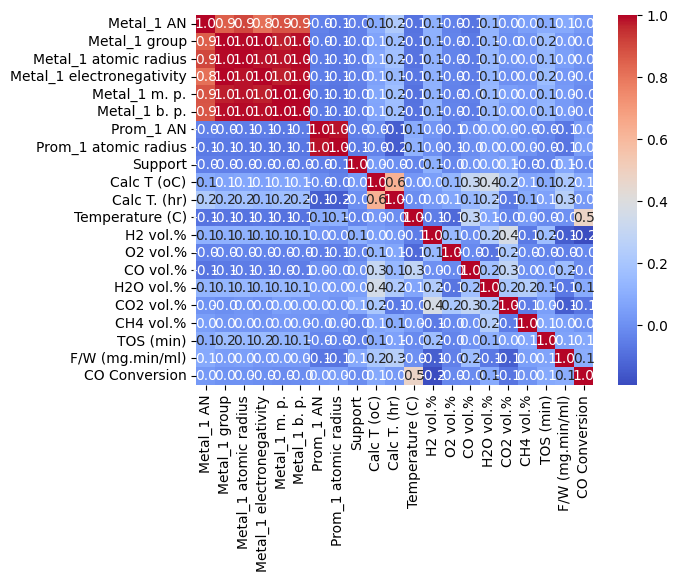

In [ ]:
cm = df.corr()
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = ".1f")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, make_scorer

In [ ]:
y=df['CO Conversion']
X=df.drop(columns={'CO Conversion'})

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xtrain=ss.fit_transform(Xtrain)
Xtest=ss.fit_transform(Xtest)
#ytrain=ss.fit_transform(ytrain)
#ytest=ss.fit_transform(ytest)


In [ ]:
# rf

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = -1)
regressor_rf.fit(Xtrain, ytrain)
y_pred_rf = regressor_rf.predict(Xtest)
r2_score(ytest,y_pred_rf)

0.6261956407818609

In [ ]:
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error)
scores = cross_val_score(estimator = regressor_rf, X = Xtrain, y = ytrain, scoring = 'r2', cv = 10)
amse = cross_val_score(estimator = regressor_rf, X = Xtrain, y = ytrain, scoring = scorer, cv = 10)
print(scores.mean() * 100)
print(scores.std() * 100)
print(amse.mean())

76.9588414168731
4.381469620026822
238.9716499251644


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators' : [325],
             'criterion' : ['poisson'],
               'max_depth' : [None],
               'min_samples_split' : [2],
               'min_samples_leaf' : [1],
               'max_samples' : [1.0],
               'max_features' : [ 0.2]
              }]
grid_search = GridSearchCV(estimator = regressor_rf,
                           param_grid = parameters,
                           scoring = 'r2',
                          cv = 15,
                          n_jobs = -1)
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=15, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'criterion': ['poisson'], 'max_depth': [None],
                          'max_features': [0.2], 'max_samples': [1.0],
                          'min_samples_leaf': [1], 'min_samples_split': [2],
                          'n_estimators': [325]}],
             scoring='r2')

In [ ]:
grid_search.best_score_

0.8088991472801316

In [ ]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 325}

In [ ]:
print(amse.mean()) #after optimization

238.9716499251644


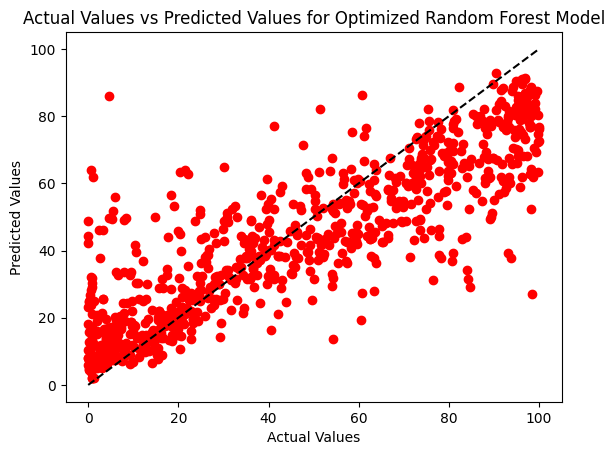

In [ ]:
best_params = grid_search.best_params_
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred_rft= best_rf_model.predict(Xtest)

# Create a scatter plot of true values vs predicted values
plt.scatter(ytest, y_pred_rft,color='red')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='black',linestyle='--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values for Optimized Random Forest Model')
plt.show()

In [ ]:
# xgb

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(Xtrain, ytrain)
y_pred_xgb = model.predict(Xtest)
r2_score(ytest, y_pred_xgb)

0.5494854649438567

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = model, X = Xtrain, y = ytrain, scoring = 'r2', cv = 10)
print(scores.mean() * 100)
print(scores.std() * 100)

81.8927164333785
3.1934203192714743


In [ ]:
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error)
scores = cross_val_score(estimator = model, X = Xtrain, y = ytrain, scoring = 'r2', cv = 10)
amse = cross_val_score(estimator = model, X = Xtrain, y = ytrain, scoring = scorer, cv = 10)
print(scores.mean() * 100)
print(scores.std() * 100)
print(amse.mean())

81.8927164333785
3.1934203192714743
187.7579031932985


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{
    'learning_rate': [0.1],
    'n_estimators': [326],
    'max_depth': [None],
    'min_child_weight': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.8],
    'gamma': [0.125],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1]
}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'r2',
                          cv = 15,
                          n_jobs = -1)
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=15,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.8], 'gamma': [0.125],
                          'learning_rate': [0.1], 'max_depth': [None],
                          'min_child_weight': [5], 'n_estimators': [326],
                          'reg_alpha': [0.1], 'reg_lambda': [0.1],
                          'subsample': [0.9]}],
             scoring='r2')

In [ ]:
print(grid_search.best_score_)

0.8276921451778946


In [ ]:
print(amse.mean()) #after optimization

187.7579031932985


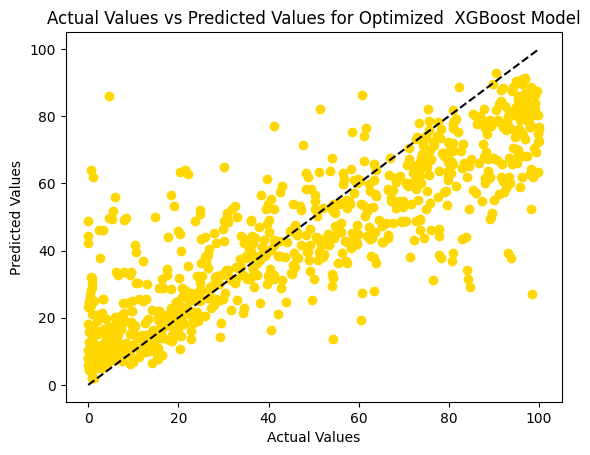

In [ ]:
best_params = grid_search.best_params_
best_xg_model = xgb.XGBRegressor(random_state=42, **best_params)
best_xg_model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred_xg= best_rf_model.predict(Xtest)

# Create a scatter plot of true values vs predicted values
plt.scatter(ytest, y_pred_xg,color='gold')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='black',linestyle='--', label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values for Optimized  XGBoost Model')
plt.show()

In [ ]:
# lightgbm

from lightgbm import LGBMRegressor
regressor = LGBMRegressor()
regressor.fit(Xtrain, ytrain)
y_pred = regressor.predict(Xtest)
r2_score(ytest, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 20
[LightGBM] [Info] Start training from score 41.535188


0.6639328385979548

In [ ]:
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error)
scores = cross_val_score(estimator = regressor, X = Xtrain, y = ytrain, scoring = 'r2', cv = 10)
amse = cross_val_score(estimator = regressor, X = Xtrain, y = ytrain, scoring = scorer, cv = 10)
print(scores.mean() * 100)
print(scores.std() * 100)
print(amse.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 3006, number of used features: 20
[LightGBM] [Info] Start training from score 41.454001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 3007, number of used features: 20
[LightGBM] [Info] Start training from score 40.990935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{
    'learning_rate': [0.1],
    'n_estimators': [328],
    'max_depth': [None],
    'num_leaves': [32],
    'min_child_samples': [11],
    'colsample_bytree': [0.6],
    'subsample' : [0.4],
    'min_split_gain' : [0.0],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                          cv = 15,
                          n_jobs = -1)
grid_search.fit(Xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 20
[LightGBM] [Info] Start training from score 41.535188


GridSearchCV(cv=15, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.6], 'learning_rate': [0.1],
                          'max_depth': [None], 'min_child_samples': [11],
                          'min_split_gain': [0.0], 'n_estimators': [328],
                          'num_leaves': [32], 'reg_alpha': [0.1],
                          'reg_lambda': [0.1], 'subsample': [0.4]}],
             scoring='r2')

In [ ]:
grid_search.best_score_ # lightgbm

0.8284206678337083

In [ ]:
print(amse.mean()) #after optimization

209.5491676966952


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 20
[LightGBM] [Info] Start training from score 41.535188


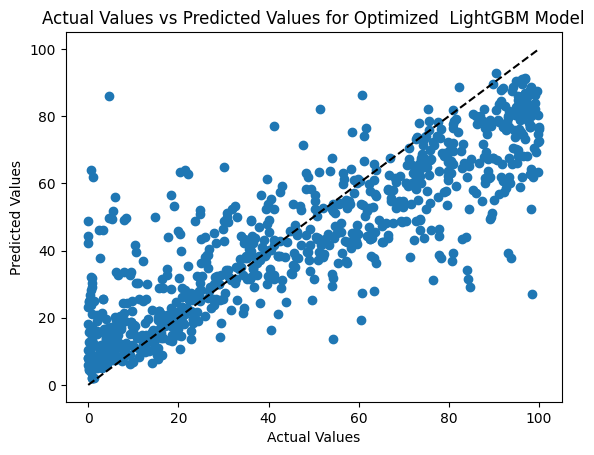

In [ ]:
best_params = grid_search.best_params_
best_xg_model = LGBMRegressor(random_state=42, **best_params)
best_xg_model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred_xg= best_rf_model.predict(Xtest)

# Create a scatter plot of true values vs predicted values
plt.scatter(ytest, y_pred_xg)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='black',linestyle='--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values for Optimized  LightGBM Model')
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostRegressor
reg=CatBoostRegressor()
reg.fit(Xtrain,ytrain)
ypred_cat=reg.predict(Xtest)
r2_score(ytest,ypred_cat)

Learning rate set to 0.04954
0:	learn: 31.7767226	total: 49.4ms	remaining: 49.4s
1:	learn: 31.1650621	total: 52ms	remaining: 26s
2:	learn: 30.5583806	total: 54.5ms	remaining: 18.1s
3:	learn: 29.9886570	total: 57.3ms	remaining: 14.3s
4:	learn: 29.5275546	total: 59.8ms	remaining: 11.9s
5:	learn: 29.0792508	total: 62.3ms	remaining: 10.3s
6:	learn: 28.6215877	total: 64.8ms	remaining: 9.19s
7:	learn: 28.2260860	total: 67.3ms	remaining: 8.34s
8:	learn: 27.8426256	total: 69.6ms	remaining: 7.66s
9:	learn: 27.4976651	total: 72.1ms	remaining: 7.14s
10:	learn: 27.1658217	total: 74.5ms	remaining: 6.7s
11:	learn: 26.7990983	total: 77.2ms	remaining: 6.36s
12:	learn: 26.4837964	total: 79.7ms	remaining: 6.05s
13:	learn: 26.1478943	total: 82.1ms	remaining: 5.78s
14:	learn: 25.8294950	total: 84.6ms	remaining: 5.55s
15:	learn: 25.5463089	total: 87ms	remaining: 5.35s
16:	learn: 25.2830630	total: 89.5ms	remaining: 5.17s
17:	learn: 25.0947555	total: 91.9ms	remaining: 5.01s
18:	learn: 24.8331381	total: 94.4m

0.7338953075709801

In [ ]:
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error)
scores = cross_val_score(estimator = reg, X = Xtrain, y = ytrain, scoring = 'r2', cv = 10)
amse = cross_val_score(estimator = reg, X = Xtrain, y = ytrain, scoring = scorer, cv = 10)
print(scores.mean() * 100)
print(scores.std() * 100)
print(amse.mean())

Streaming output truncated to the last 5000 lines.
7:	learn: 28.3100523	total: 26.1ms	remaining: 3.24s
8:	learn: 27.9337785	total: 28.6ms	remaining: 3.15s
9:	learn: 27.5226419	total: 31.1ms	remaining: 3.08s
10:	learn: 27.1972688	total: 33.5ms	remaining: 3.01s
11:	learn: 26.8102685	total: 35.9ms	remaining: 2.96s
12:	learn: 26.4435156	total: 38.4ms	remaining: 2.92s
13:	learn: 26.1209308	total: 40.7ms	remaining: 2.87s
14:	learn: 25.8057140	total: 43ms	remaining: 2.83s
15:	learn: 25.4976574	total: 45.5ms	remaining: 2.79s
16:	learn: 25.1857282	total: 47.8ms	remaining: 2.77s
17:	learn: 25.0038089	total: 50.3ms	remaining: 2.74s
18:	learn: 24.7408867	total: 52.8ms	remaining: 2.72s
19:	learn: 24.4982932	total: 55.2ms	remaining: 2.7s
20:	learn: 24.3103752	total: 57.6ms	remaining: 2.69s
21:	learn: 24.0694229	total: 59.9ms	remaining: 2.66s
22:	learn: 23.8891520	total: 62.2ms	remaining: 2.64s
23:	learn: 23.7507387	total: 64.7ms	remaining: 2.63s
24:	learn: 23.5991958	total: 67ms	remaining: 2.61s
25:

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{
    'learning_rate': [0.1],
    'l2_leaf_reg':[1],
    'border_count': [64],
    'bagging_temperature': [0.6],
    'min_data_in_leaf': [4],
    'iterations': [350]
}]
grid_search = GridSearchCV(estimator = reg,
                           param_grid = parameters,
                           scoring = 'r2',
                          cv = 15,
                          n_jobs = -1)
grid_search.fit(Xtrain, ytrain)

0:	learn: 31.0225538	total: 2.04ms	remaining: 712ms
1:	learn: 29.9214867	total: 4.58ms	remaining: 798ms
2:	learn: 28.8950985	total: 6.39ms	remaining: 739ms
3:	learn: 28.0329019	total: 8.14ms	remaining: 704ms
4:	learn: 27.2158985	total: 9.94ms	remaining: 686ms
5:	learn: 26.4530349	total: 12ms	remaining: 686ms
6:	learn: 25.6937827	total: 14.1ms	remaining: 689ms
7:	learn: 25.1642422	total: 16ms	remaining: 683ms
8:	learn: 24.6800926	total: 18ms	remaining: 681ms
9:	learn: 24.2091854	total: 20ms	remaining: 679ms
10:	learn: 23.7685516	total: 21.9ms	remaining: 675ms
11:	learn: 23.2166595	total: 23.8ms	remaining: 669ms
12:	learn: 22.8657944	total: 25.6ms	remaining: 663ms
13:	learn: 22.4863252	total: 27.6ms	remaining: 661ms
14:	learn: 22.1745930	total: 29.6ms	remaining: 662ms
15:	learn: 21.8869400	total: 31.7ms	remaining: 663ms
16:	learn: 21.6803803	total: 33.6ms	remaining: 659ms
17:	learn: 21.4837891	total: 35.8ms	remaining: 659ms
18:	learn: 21.2884070	total: 37.7ms	remaining: 657ms
19:	learn: 

GridSearchCV(cv=15,
             estimator=<catboost.core.CatBoostRegressor object at 0x780a47575b40>,
             n_jobs=-1,
             param_grid=[{'bagging_temperature': [0.6], 'border_count': [64],
                          'iterations': [350], 'l2_leaf_reg': [1],
                          'learning_rate': [0.1], 'min_data_in_leaf': [4]}],
             scoring='r2')

In [ ]:
grid_search.best_score_ #catboost

0.8188754294273067

In [ ]:
print(amse.mean()) #after optimization

190.42845238689955


0:	learn: 31.1974682	total: 2.03ms	remaining: 708ms
1:	learn: 30.1703866	total: 6.09ms	remaining: 1.06s
2:	learn: 29.1292322	total: 7.84ms	remaining: 907ms
3:	learn: 28.1703569	total: 10.1ms	remaining: 874ms
4:	learn: 27.3522905	total: 13.4ms	remaining: 923ms
5:	learn: 26.6973201	total: 18.7ms	remaining: 1.07s
6:	learn: 26.0034096	total: 20.7ms	remaining: 1.01s
7:	learn: 25.3007350	total: 22.9ms	remaining: 978ms
8:	learn: 24.8179078	total: 25ms	remaining: 947ms
9:	learn: 24.4229063	total: 26.9ms	remaining: 913ms
10:	learn: 23.9680561	total: 29.1ms	remaining: 897ms
11:	learn: 23.5811152	total: 30.8ms	remaining: 869ms
12:	learn: 23.1790448	total: 33.1ms	remaining: 859ms
13:	learn: 22.8676576	total: 35ms	remaining: 841ms
14:	learn: 22.5699179	total: 37ms	remaining: 827ms
15:	learn: 22.3007349	total: 39.2ms	remaining: 818ms
16:	learn: 21.9248903	total: 41.3ms	remaining: 809ms
17:	learn: 21.6857106	total: 43.3ms	remaining: 799ms
18:	learn: 21.5114563	total: 45.5ms	remaining: 792ms
19:	learn

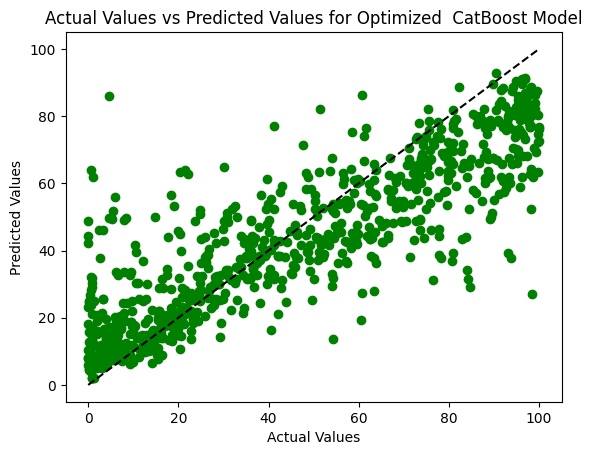

In [ ]:
best_params = grid_search.best_params_
best_xg_model = CatBoostRegressor(random_state=42, **best_params)
best_xg_model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred_xg= best_rf_model.predict(Xtest)

# Create a scatter plot of true values vs predicted values
plt.scatter(ytest, y_pred_xg,color='green')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='black',linestyle='--', label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values for Optimized  CatBoost Model')
plt.show()